In [22]:
import comparison as cmp
import numpy as np
import matplotlib.pyplot as plt
TWOPI = cmp.TWOPI

In [23]:
# RS = cmp.RoughSubstrate(l=3.0357142857142856,mu_f=5.34,R0=15,a=1,theta_g_0_flat=105.8,theta_e=55.6)
# RS = cmp.RoughSubstrate(l=3.5,mu_f=5.34,R0=15,a=1,theta_g_0_flat=105.8,theta_e=55.6)
# RS = cmp.RoughSubstrate(l=1.5,mu_f=5.34,R0=15,a=0.5,theta_g_0_flat=105.8,theta_e=55.6)

etaw = 0.69
RS = cmp.RoughSubstrate(l=2.5,mu_f=10*etaw,R0=20,a=0.8,theta_g_0_flat=105.8,theta_e=55.6)

EM = cmp.EulerMurayama(RS=RS,t_fin=50.0,t_bin=0.1,M=25)
EM.simulate_ode(RS)
EM.simulate_sde(RS)

theta_w = RS.theta_w
print("theta_w       = "+str(theta_w)+" [deg]")
theta_fin_ode = EM.theta_g_vec[-1]
print("theta_fin_ode = "+str(theta_fin_ode)+" [deg]")
theta_fin_sde = np.mean(EM.theta_g_ens[int(0.8*EM.Nt):])
print("theta_fin_sde = "+str(theta_fin_sde)+" [deg]")

C.l. friction         = 6.8999999999999995 [cP]
Corrugation length    = 2.5 [nm]
Corrugation number    = 144.0 [1/nm]
Droplet radius        = 20 [nm]
Roughness coefficient = 0.8 [1]
Initial c.a. on flat  = 105.8 [deg]
Equilibrium c. a.     = 55.6 [deg]
Reference time        = 0.2984429065743945 [ns]
Corrugation height    = 0.005555555555555556 [nm]
Initial c. a          = 108.15935253553884 [deg]
Initial c.l. distance = 22.793082123480026 [nm]
[TEST] : theta_g_0    = 108.15935253553884 [deg]
Noise (nondim.)       = 0.012258737551410147 [1]
Final time            = 50.0 [ns]
T_fin (nondim.)       = 167.53623188405797 [1]
dt (nondim.)          = 0.03350724637681159 [1]
#replicas             = 25
Sim. replica 1
Sim. replica 2
Sim. replica 3
Sim. replica 4
Sim. replica 5
Sim. replica 6
Sim. replica 7
Sim. replica 8
Sim. replica 9
Sim. replica 10
Sim. replica 11
Sim. replica 12
Sim. replica 13
Sim. replica 14
Sim. replica 15
Sim. replica 16
Sim. replica 17
Sim. replica 18
Sim. replica 19
Sim

<IPython.core.display.Javascript object>


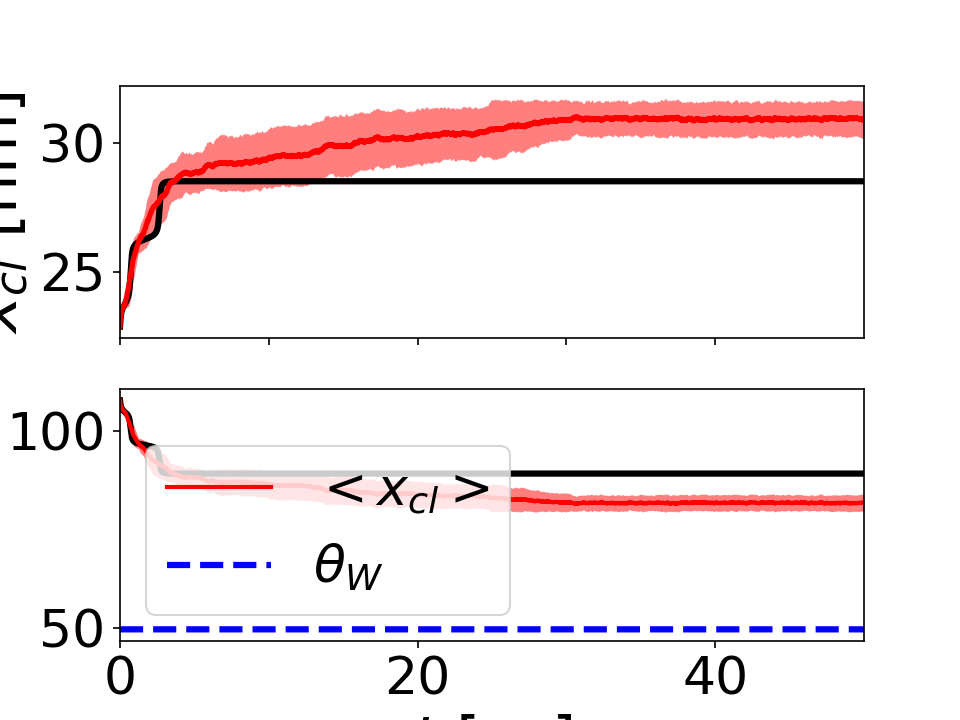

In [24]:
%matplotlib notebook
fig1, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(RS.tau*EM.t_vec, TWOPI*EM.x_vec/RS.k, 'k-', linewidth=3.0)
ax1.plot(RS.tau*EM.t_vec, TWOPI*EM.x_ens/RS.k, 'r-', linewidth=2.5)
ax1.fill_between(RS.tau*EM.t_vec,TWOPI*(EM.x_ens+EM.x_std)/RS.k,TWOPI*(EM.x_ens-EM.x_std)/RS.k,color='r',alpha=0.5,linewidth=0.0)
ax1.set_ylabel(r'$x_{cl}$ [nm]', fontsize=30.0)
ax1.set_xlim([RS.tau*EM.t_vec[0], RS.tau*EM.t_vec[-1]])
ax1.tick_params(axis='x',which='both',labelbottom=False)
ax1.tick_params(axis='y', labelsize=25)
ax2.plot(RS.tau*EM.t_vec, EM.theta_g_vec, 'k-', linewidth=3.0)
ax2.plot(RS.tau*EM.t_vec, EM.theta_g_ens, 'r-', linewidth=2.0, label=r'$<x_{cl}>$')
ax2.fill_between(RS.tau*EM.t_vec,EM.theta_g_ens+EM.theta_std,EM.theta_g_ens-EM.theta_std,color='r',alpha=0.5,linewidth=0.0)
ax2.plot(RS.tau*EM.t_vec, RS.theta_w*np.ones(EM.t_vec.shape), 'b--', linewidth=3, label=r'$\theta_W$')
ax2.set_xlabel(r'$t$ [ns]', fontsize=30.0)
ax2.set_ylabel(r'$\theta_g$ [deg]', fontsize=30.0)
ax2.set_xlim([RS.tau*EM.t_vec[0], RS.tau*EM.t_vec[-1]])
ax2.legend(fontsize=25)
ax2.tick_params(axis='x', labelsize=25)
ax2.tick_params(axis='y', labelsize=25)
plt.show()

In [25]:
# EM.fit_cl_friction(RS,mv=10000)
EM.fit_cl_friction_ls(RS,mv=10000)

Eff. c.l. friction    = 2211.7138190877777 [cP]


array([0.24078706, 1.29342025, 9.21370347])

<IPython.core.display.Javascript object>


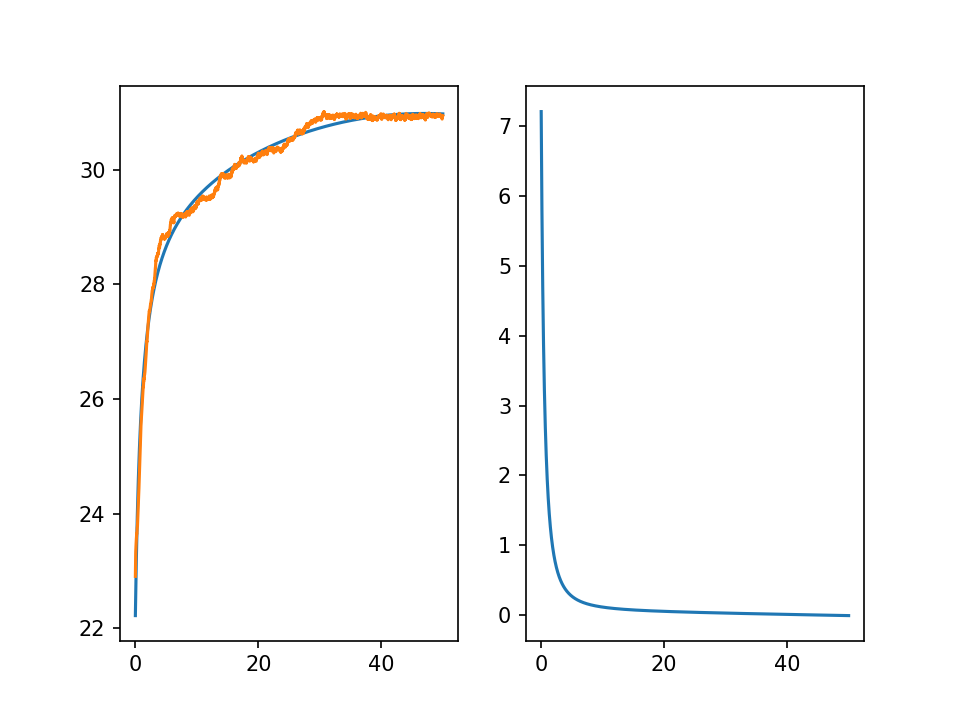

In [26]:
%matplotlib notebook
fig1, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(EM.t, EM.x_fit)
ax1.plot(EM.t, EM.x)
ax2.plot(EM.t, EM.v_fit)
plt.show()

<IPython.core.display.Javascript object>


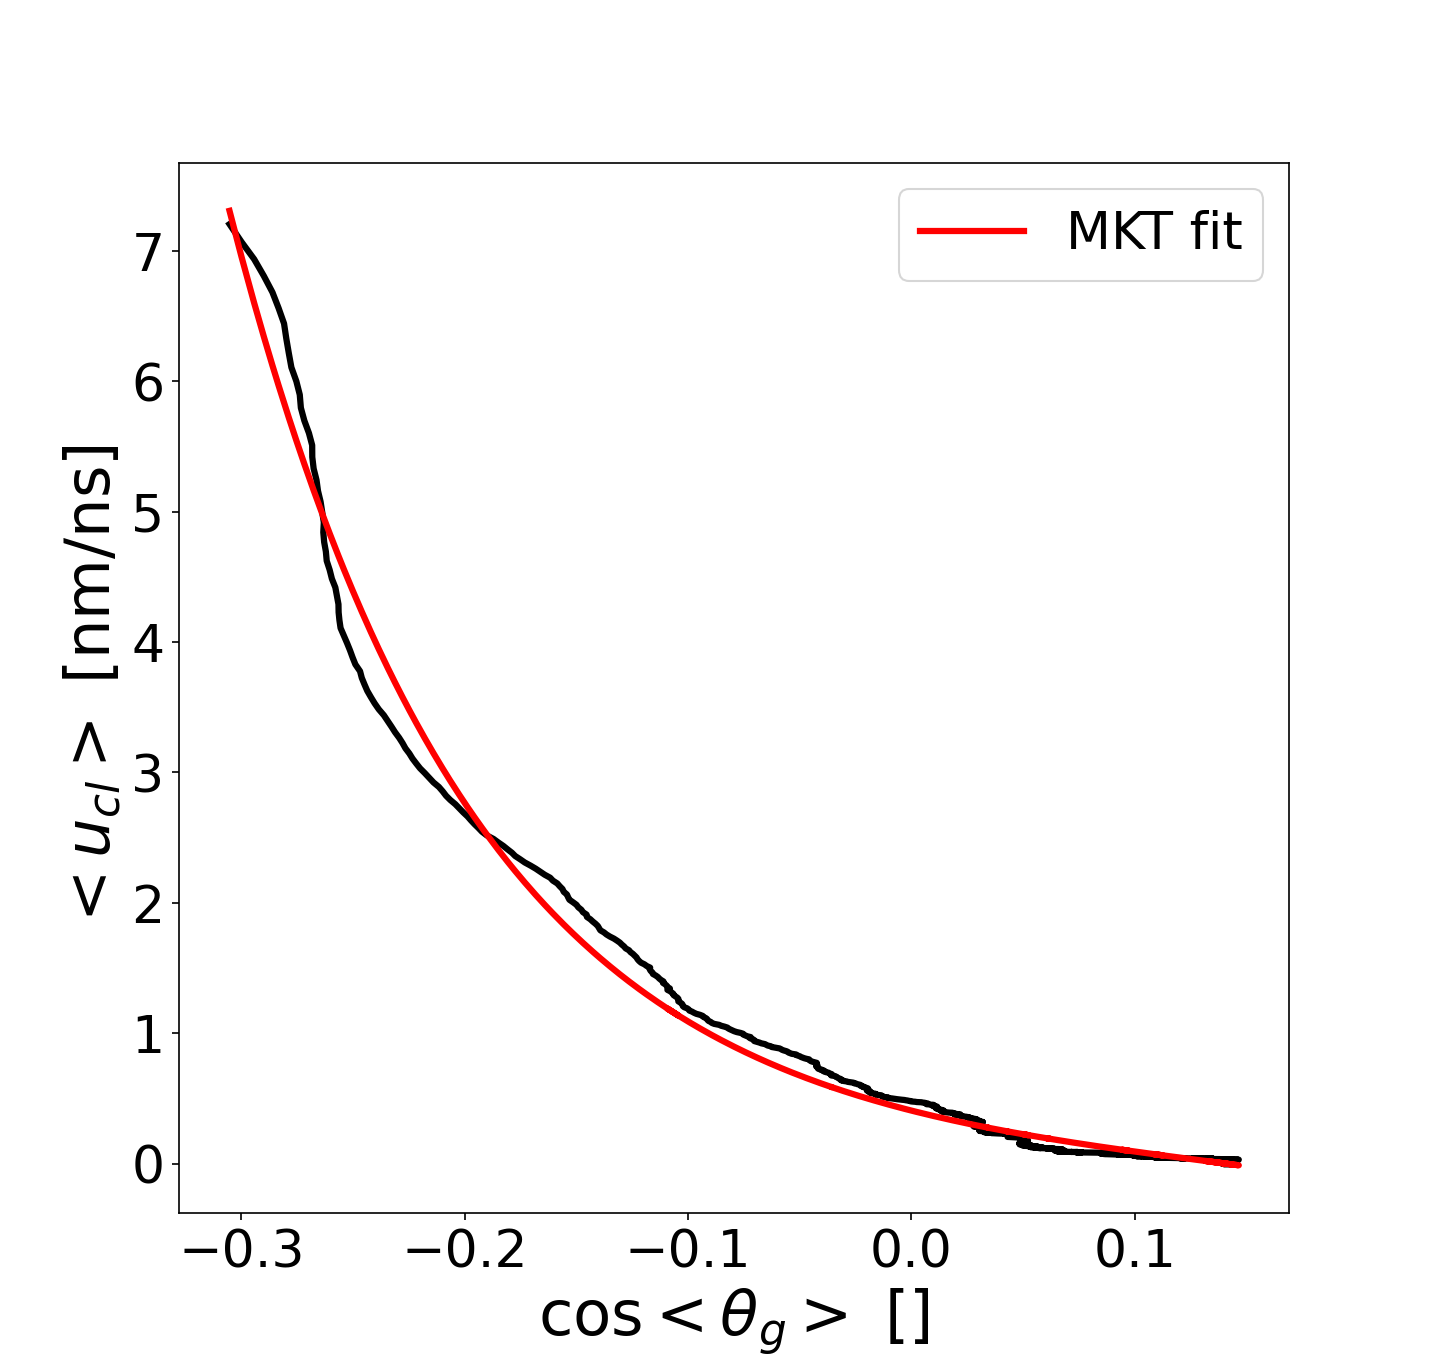

In [27]:
%matplotlib notebook
fig, ax = plt.subplots(1, 1)
plt.plot(EM.ct, EM.v_fit, 'k-', linewidth=3.0)
plt.plot(EM.ct, EM.v_mkt, 'r-', linewidth=3.0, label='MKT fit')
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
plt.legend(fontsize=25)
plt.xlabel(r'$\cos<\theta_g>$ []', fontsize=30.0)
plt.ylabel(r'$<u_{cl}>$ [nm/ns]', fontsize=30.0)
plt.show()